   # *Braintels Labs*
   ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS

### Regresión logistica:
La regresión logistica es un modelo de clasificación utilizado en problemas de clasificación binaria y multiclase .A pesar de su nombre 'regresión' logistica no implica un modelo de regresión sino un modelo de clasificación probabilistico.

La regresión logistica Binaria tiene como objetivo construir una recta de decisión la cual separara en 2 clases la distribución de los datos . 

La exactitud en la clasificación mediante la regresión logisitica alcanza valores altos siempre y cuando los datos puedan ser separados de forma lineal , caso contrario(no-lineal) el modelo no ofrece una buena respuesta .

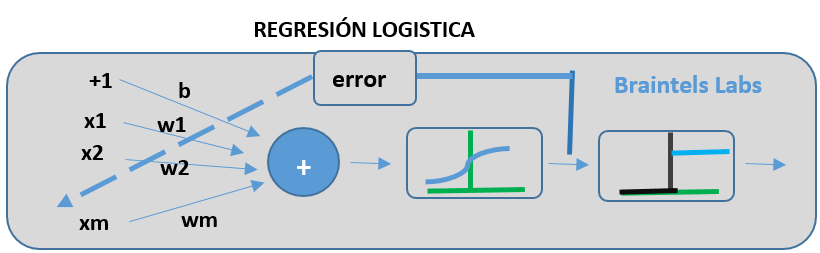

In [32]:
from IPython.display import Image
Image(filename="img.png")

#### Función de costo :
la función de costo utilizada en la regresión logistica es conocido como **CROSS ENTROPY**


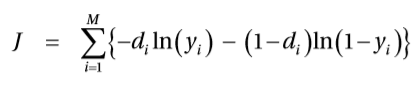

In [33]:
Image(filename="img2.png")

El objeto es encontrar un modelo mediante la regresión logistica de tal manera que pueda clasificar si se encuentra un objeto denominado planta versicola (1) o no se encuentra (0).  
El data set que se utilizara es el  IRIS DATASET del repositorio UCI machine learning.

In [34]:
#importar herramientas necesarias
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import tensorflow as tf

ejemplos rojos :  50
ejemplos azul :  100


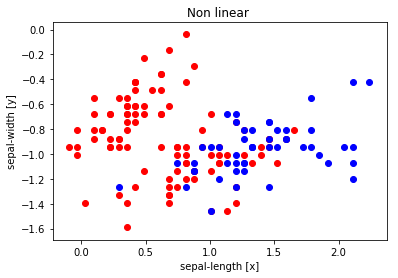

In [57]:

#-----------------------------IMPORTAR DATA SET --------------------------------
#--------------------- UCI MACHINE LEARNING REPOSITORY--------------------------
iris = datasets.load_iris()
#tomar solo dos caracteristicas sepal_length y sepal_width
Xd= iris.data[:, :2]
Xd=(Xd-np.mean(Xd))/np.sqrt(np.var(Xd))
#--------------- 
y = iris.target
Yd=np.where(y==0,1,0) 
cf=np.count_nonzero(Yd)
cv=Yd.size-cf
print("ejemplos rojos : ",cf)
print("ejemplos azul : ",cv)
c1=['r' for a in range(cv)]
c2=['b' for a in range(cf)]
colores=c1+c2
fig = plt.figure()
for i in range(Yd.size):
    plt.scatter(Xd[i,0],Xd[i,1],c=colores[i])
plt.title("Non linear ")
plt.xlabel("sepal-length [x]")
plt.ylabel("sepal-width [y]")
plt.show()

In [58]:
#-----parametros
R=Xd.shape[1] #cantidad de entradas sepal_length y sepal_width
Batch=1     #batch para las actualizaciones de los pesos sinapticos  
S=1 # una neurona de salida
ejemplos=y.size #cantidad de ejemplos

In [59]:
#-----------------CREAR GRAFO COMPUTACIONAL --------------------------------------------
logistic=tf.Graph()
with logistic.as_default():
    #definir Entrada  RxBatch
    Xi=tf.compat.v1.placeholder(shape=(R,Batch),dtype=tf.float32,name="Xi")
    print("EXTRANDA X , DIMENSIONES:",Xi.shape)
    #definir Salida ( 1x 1)
    Ti=tf.compat.v1.placeholder(shape=(1,Batch),dtype=tf.float32,name="Ti")
    #--------------- Pesos sinapticos  SxR
    #tf.random.truncated_normal(shape=(1,R),mean=0.0,stddev=1.0)
    W=tf.Variable(tf.zeros(shape=(1,R)),dtype=tf.float32,name="W")
    #*------------- Bias 1xR 
    #B=tf.Variable(tf.random.truncated_normal(shape=(1,1),mean=0.0,stddev=1.0),dtype=tf.float32,name="B")
    B=tf.Variable(tf.zeros(shape=(1,1)),dtype=tf.float32,name="B")
    #------------Entrada neta V Sx1
    V=tf.add(tf.matmul(W,Xi),B,name="V")
    #--------------Salida logistica Ys Sx1
    Ys=tf.nn.sigmoid(V,name="Ys")
    #---------------Salida escalon unitario Y Sx1
    Y=tf.nn.relu(tf.math.sign(Ys-0.87),"Y")
    #---------------Definir Función De Costo Cross Entropy 
    cross_loss=-tf.multiply(Ti,tf.math.log(Ys+0.000000001)) -tf.multiply(1.0-Ti,tf.math.log(1-Ys+0.00000001))
    print("RESPUESTA Y , DIMENSIONES:",Y.shape)
    comp=tf.equal(Y,Ti,name="comparar")
    #devolver el número 1 cuando ambos son iguales
    accuracy=tf.cast(comp,dtype=tf.float32,name="accuracy")
    #-------------Optimizador Gradiente Descendente 
    optimizador=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05)
    train=optimizador.minimize(loss=cross_loss)


EXTRANDA X , DIMENSIONES: (2, 1)
RESPUESTA Y , DIMENSIONES: (1, 1)


In [60]:
#----------------Sesión para ejecutar el grafo computacional --------------------

with tf.compat.v1.Session(graph=logistic) as sesion:
    #-------  Inicializar variables globales  ------------
    sesion.run(tf.compat.v1.global_variables_initializer())
    epocas=200
    costo=[]
    loss=0
    #-------  #para cada epoca de entrenamiento -----------
    for e in range(epocas):
        exactitud=0
        for i in range(ejemplos):
            #------------------------------------------(R,batch)--------------------(S,batch)
            val=sesion.run(cross_loss,feed_dict={Xi:np.reshape(Xd[i,:],(2,1)),Ti:np.reshape(Yd[i],(1,1))})
            sesion.run(train,feed_dict={Xi:np.reshape(Xd[i,:],(2,1)),Ti:np.reshape(Yd[i],(1,1))})
            exactitud=exactitud+sesion.run(accuracy,feed_dict={Xi:np.reshape(Xd[i,:],(2,1)),Ti:np.reshape(Yd[i],(1,1))})

        if e%4==0:
            costo.append(val.flatten())
    Ws=sesion.run(W)
    Bs=sesion.run(B)

Text(0, 0.5, 'Cross Entropy')

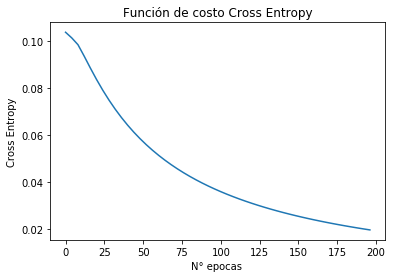

In [62]:

#plotear el indice de rendimineto con respecto a las epocas de entrenamiento
ep=np.arange(0,epocas,4)
plt.plot(ep,costo)
plt.title("Función de costo Cross Entropy")
plt.xlabel("N° epocas ")
plt.ylabel("Cross Entropy")
 


Text(0, 0.5, 'sepal width [x2]')

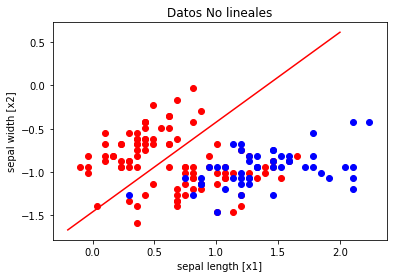

In [63]:
#-----------------GRAFICA DE LA RECTA DE SEPARACIÓN ------------------------------
x1=np.linspace(-0.2,2,ejemplos)
x2=-(Ws[0,0]*x1+Bs[0,0])/Ws[0,1]
for i in range(Yd.size):
    plt.scatter(Xd[i,0],Xd[i,1],c=colores[i])
plt.plot(x1,x2,c='r')
plt.title("Datos No lineales")
plt.xlabel("sepal length [x1]")
plt.ylabel("sepal width [x2]")


#### BRAINTELS LABS 
ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS